In [27]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
digit_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

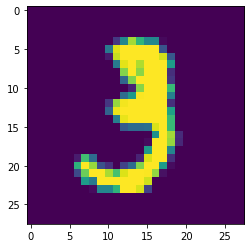

In [30]:
plt.imshow(X_train_full[10])

In [31]:
y_train_full[0]

5

In [32]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

In [33]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [34]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [35]:
np.random.seed(42)
tf.random.set_seed(42)

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [38]:
import pydot
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [39]:
weights, biases = model.layers[1].get_weights()

In [40]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [41]:
weights.shape

(784, 200)

In [42]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
biases.shape

(200,)

In [44]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [45]:
model_history = model.fit(X_train, y_train, epochs=60,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9292 - val_loss: 0.2254 - val_accuracy: 0.9383
Epoch 4/60
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1960 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1893 - accuracy: 0.9462 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1690 - accuracy: 0.9517 - val_loss: 0.1636 - val_accuracy: 0.9523
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.1482 - val_accuracy:

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0091 - accuracy: 0.9993 - val_loss: 0.0792 - val_accuracy: 0.9778
Epoch 58/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0774 - val_accuracy: 0.9780
Epoch 59/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0085 - accuracy: 0.9993 - val_loss: 0.0798 - val_accuracy: 0.9775
Epoch 60/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0081 - accuracy: 0.9994 - val_loss: 0.0804 - val_accuracy: 0.9778


In [46]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [47]:
model_history.history

{'loss': [0.6606810092926025,
  0.30064913630485535,
  0.2487981915473938,
  0.21510349214076996,
  0.18926940858364105,
  0.16897433996200562,
  0.15208911895751953,
  0.1378149390220642,
  0.12602238357067108,
  0.11574868857860565,
  0.10665197670459747,
  0.09912078082561493,
  0.0917426273226738,
  0.08571787178516388,
  0.08017408847808838,
  0.07520255446434021,
  0.07071936130523682,
  0.06596267968416214,
  0.062466055154800415,
  0.058755479753017426,
  0.055551666766405106,
  0.052507057785987854,
  0.04960666969418526,
  0.046830616891384125,
  0.044307250529527664,
  0.04205114766955376,
  0.0398421585559845,
  0.03780525550246239,
  0.035807617008686066,
  0.03386164829134941,
  0.03217605873942375,
  0.030398977920413017,
  0.02898690290749073,
  0.0274195596575737,
  0.026024673134088516,
  0.02466435916721821,
  0.023699229583144188,
  0.022346055135130882,
  0.02120090276002884,
  0.02023129351437092,
  0.019154328852891922,
  0.018278125673532486,
  0.017422463744878

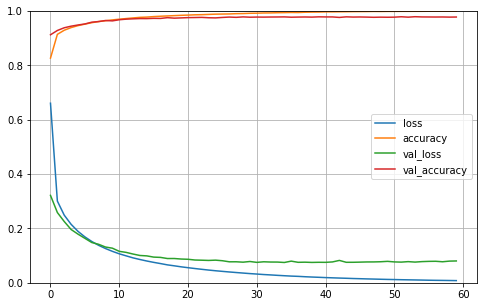

In [48]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [49]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9792


[0.074105404317379, 0.979200005531311]

In [50]:
X_new = X_test[:3]

In [51]:
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1], dtype=int64)

AxesImage(54,36;334.8x217.44)


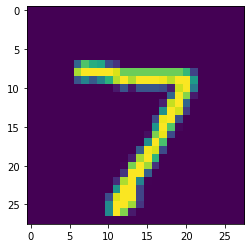

In [53]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


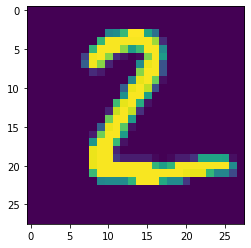

In [54]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


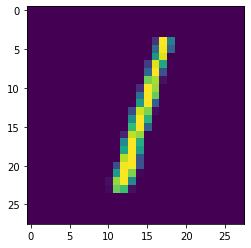

In [55]:
print(plt.imshow(X_test[2]))